* workflow would be -> start -> show_eq -> cal_discriminant -> deside conditionally (no_real_roots, real_roots, repeated_roots) -> end

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, Literal

In [3]:
class QuadState(TypedDict):
  a:int
  b:int
  c:int

  eq: str 
  discriminant:float 
  result: str

In [14]:
## let try to build fn for show_eq node

def show_eq(state:QuadState):
  equation= f"{state["a"]}X^2+ {state["b"]}X+ {state["c"]}"

  return {"eq":equation}

## fn for cal_discriminant node

def calculate_discriminant(state:QuadState):
  d= state["b"]**2-4*state["a"]*state["c"]

  return {"discriminant":d}


## now time to build those three conditional node fn , but conditionally only one will be exicuated

def no_real_roots(state:QuadState):
  return {"result":"no_real_roots"}

def real_roots(state:QuadState):
  first_r= (-1*state["b"]+(state["discriminant"])**0.5)/(2*state["a"])
  second_r= (-1*state["b"]-(state["discriminant"])**0.5)/(2*state["a"])

  return {"result":f"first root is -> {first_r} and second one is {second_r}"}


def repeated_roots(state:QuadState):
  common_root= -1*state["b"]/2*state["a"]

  return {"result":f"common root is {common_root}"}


## now you have to do conditioning and for conditioning we have to create a function
## this will not a node fn ;; and it's output would be only one of these functions name
## or we can say this is a fn and its output will be a diff fn name



def check_condition(state:QuadState)-> Literal["no_real_roots", "real_roots", "repeated_roots"]:
  
  if state['discriminant']>0:
    return "real_roots"
  
  elif state["discriminant"]==0:
    return "repeated_roots"
  else:
    return "no_real_roots"



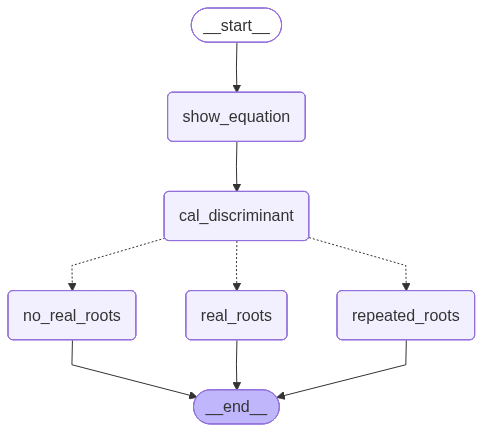

In [15]:
## now build graph

graph= StateGraph(QuadState)

## here we define all the nodes
graph.add_node('show_equation', show_eq)
graph.add_node("cal_discriminant", calculate_discriminant)

graph.add_node("no_real_roots", no_real_roots)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)

## here we define edges

graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "cal_discriminant")

graph.add_conditional_edges("cal_discriminant", check_condition)
graph.add_edge("no_real_roots", END)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)

## compile the graph
workflow= graph.compile()
workflow

In [19]:
initial_state={"a":1, "b":0, "c":0}

final_state= workflow.invoke(initial_state)

print(final_state)

{'a': 1, 'b': 0, 'c': 0, 'eq': '1X^2+ 0X+ 0', 'discriminant': 0, 'result': 'common root is 0.0'}


In [ ]:
## there is one more way to run condition egdes we will see it 
